# Analysis songs

Typografen richtten vanaf 1837 in verschillende steden in Nederland een vereniging op voor onderlinge hulp bij ziekte en voor het organiseren van het Kopperfeest op de eerste maandag na Driekoningen, maar ook andere gelegenheden. Bij feesten zongen zij eigen geschreven teksten op bekende melodieen. Ik probeer zoveel mogelijk van deze teksten, in ieder geval tot 1869 machineleesbaar in te voeren. Daarbij houd ik een CSV-bestand bij van alle liedjes, met daarin de volgende velden: (item,id,titel,wijze,jaartal,schrijver,vereniging_schrijver)

* Identifier van het liedje, opgebouwd uit een code voor de typografische vereniging (indien van toepassing), het titelwoord van het boekje, het jaartal van uitgave en het volgnummer van het liedje in het bewust boekje.
* Titel van het liedje
* Wijze van de melodie
* Jaartal van schrijven
* Schrijver
* Vereniging van de schrijver

Deze notebook geeft een overzicht van de data die ik weet over de liedjes (die tot nu toe zijn ingevoerd). Allereerst lees ik de data in een pandas dataframe.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df = pd.read_csv("data/liedjes.csv")


df = pd.read_csv("data/liedjes.csv", dtype="string")
# NB door alle data als strings in te lezen kun je met waardes niet meer rekenen, maar nog wel tellen natuurlijk.
# Zie: https://stackoverflow.com/questions/39666308/pd-read-csv-by-default-treats-integers-like-floats


Ik wil een overzicht van het aantal liedjes per jaar en per vereniging. Maar eerst: hoeveel liedjes zijn er in totaal en van hoeveel weten we het jaartal en van hoeveel weten we de vereniging.

In [4]:
len(df)

771

In [5]:
df['jaartal'].count()

765

In [6]:
df['vereniging_schrijver'].count()

767

In [7]:
df['wijze'].count()

711

Text(0, 0.5, 'number of songs')

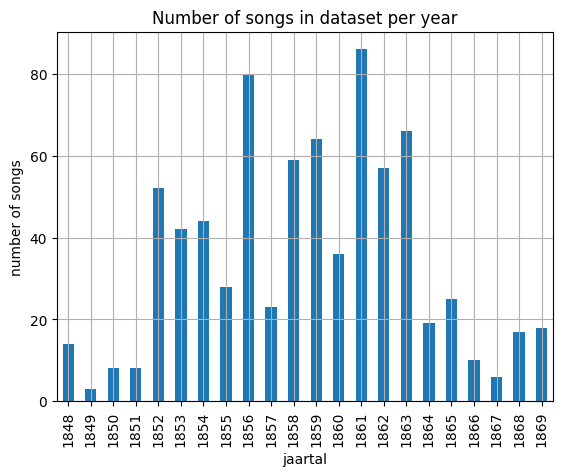

In [8]:
count_songs_per_year = df.groupby('jaartal')
ax = count_songs_per_year.size().plot(kind = "bar", title="Number of songs in dataset per year", xlim=(1845,1875), grid=True)
ax.set_ylabel('number of songs')

In [7]:
count_songs_per_year.size()['1863']

66

In [19]:
df['typoID_cat'] = df['typoID']
df.loc[df['typoID'] == 'amsterdam1847', 'typoID_cat'] = 'rest'
df.loc[df['typoID'] == 'arnhem1849', 'typoID_cat'] = 'rest'
df.loc[df['typoID'] == 'denbosch1849', 'typoID_cat'] = 'rest'
df.loc[df['typoID'] == 'gorinchem1856', 'typoID_cat'] = 'rest'
df.loc[df['typoID'] == 'leiden1854', 'typoID_cat'] = 'rest'



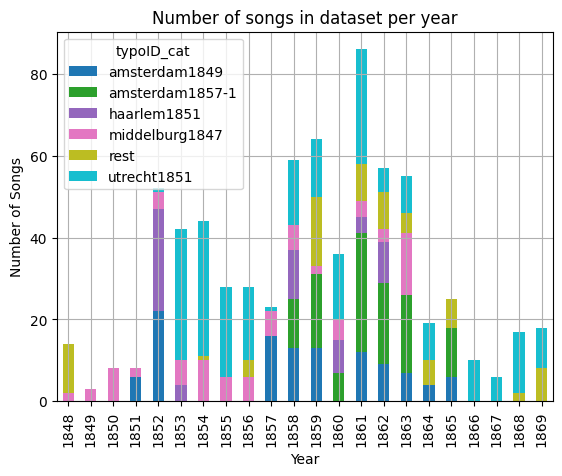

In [23]:

# Group by 'jaartal' and 'typoID' and count occurrences
count_songs_per_year_per_tv = df.groupby(['jaartal', 'typoID_cat']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
ax = count_songs_per_year_per_tv.plot(kind='bar', stacked=True, title="Number of songs in dataset per year", colormap='tab10', grid=True)

# Setting the x-axis limit
ax.set_xlim(-0.5, len(count_songs_per_year_per_tv) - 0.5)  # Adjust xlim according to number of bars

# Adding labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Songs')

# Display the plot
plt.show()


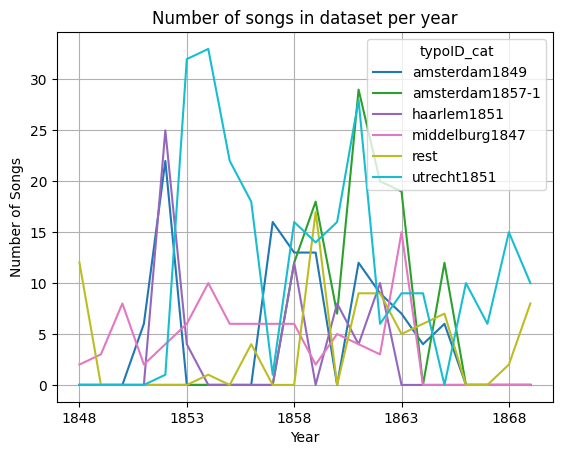

In [27]:

# Group by 'jaartal' and 'typoID' and count occurrences
count_songs_per_year_per_tv = df.groupby(['jaartal', 'typoID_cat']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
ax = count_songs_per_year_per_tv.plot(kind='line', title="Number of songs in dataset per year", colormap='tab10', grid=True)

# Setting the x-axis limit
#ax.set_xlim(-0.5, len(count_songs_per_year_per_tv) - 0.5)  # Adjust xlim according to number of bars

# Adding labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Songs')

# Display the plot
plt.show()


Nu per vereniging:

Text(0, 0.5, 'number of songs')

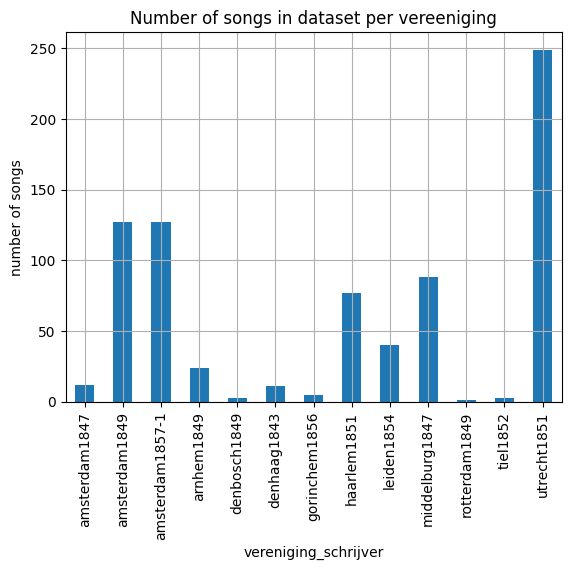

In [9]:
# df['vereniging_schrijver'].value_counts().plot(kind = 'bar')

ax = df.groupby('vereniging_schrijver').size().plot(kind="bar", title="Number of songs in dataset per vereeniging", xlim=(1845,1875), grid=True) 
ax.set_ylabel('number of songs')

Welke auteurs hebben 10 of meer liedjes geschreven?

In [10]:
df['schrijver'].value_counts().loc[lambda x : x > 9]

C. Mommaas             47
M. Smidt               38
J.H.C. Venman          31
B. Lageman             23
W. Farber              14
J.C. Paap              12
J.J. van Stempfoort    12
P. Werthweijn          11
P.G. van de Kamp       11
J.P. Nobels            10
J. Breeman             10
Name: schrijver, dtype: Int64

Op welke wijzes werd een tekst geschreven?

In [11]:
df['wijze'].value_counts().loc[lambda x : x > 9]

Wien Neerlands bloed                       106
Henri's drinklied                           68
De wereld is in rep en roer                 50
Io Vivat                                    45
De Koning leef                              25
Wie praalt aan 't hoofd der Heldenstoet     17
Eens werd er aan de zeeuwsche kust          16
Schep vreugde in 't leven                   14
God save the king                           12
Schilder! ‘k wou mij zelv’ eens zien        10
Name: wijze, dtype: Int64

Text(0, 0.5, 'number of songs')

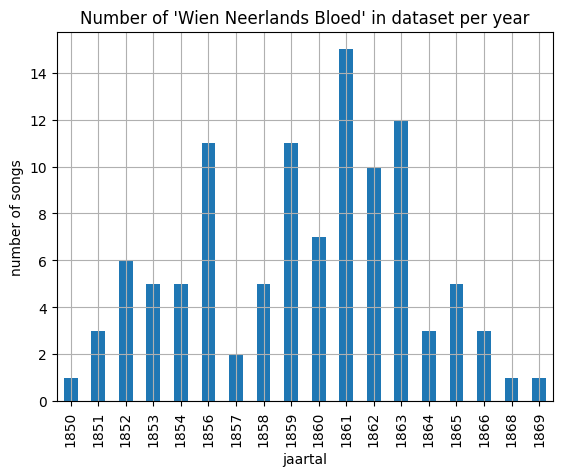

In [12]:
count_volkslied_per_year = df.loc[df['wijze']=='Wien Neerlands bloed'].groupby('jaartal')
ax = count_volkslied_per_year.size().plot(kind="bar", title="Number of 'Wien Neerlands Bloed' in dataset per year", xlim=(1845,1875), grid=True)
ax.set_ylabel('number of songs')

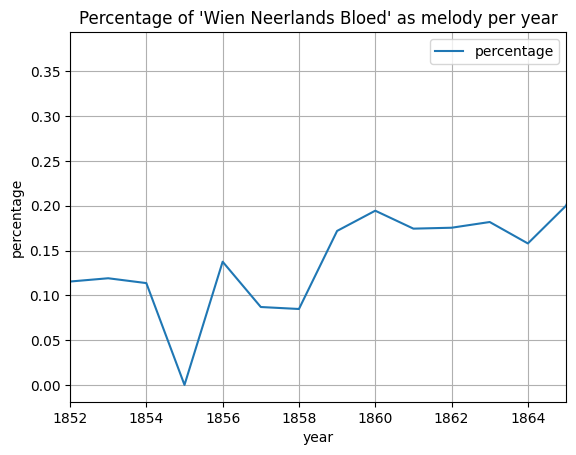

In [13]:
years = []
count_songs = []
count_volkslied = []
count_volkslied_relative = []

for year in count_songs_per_year.size().index.unique():
    years.append(int(year))
    count_songs.append(count_songs_per_year.size()[year])
    if year in count_volkslied_per_year.size().index.unique():
        count_volkslied.append(count_volkslied_per_year.size()[year])
        count_volkslied_relative.append(count_volkslied_per_year.size()[year]/count_songs_per_year.size()[year])
    else: 
        count_volkslied.append(0)
        count_volkslied_relative.append(0)

df_wijze_counts = pd.DataFrame(
    {'year': years,
     'count_songs': count_songs,
     'count_volkslied': count_volkslied,
     'count_volkslied_relative': count_volkslied_relative
    })

ax = df_wijze_counts.plot(x='year', y='count_volkslied_relative', kind='line', title="Percentage of 'Wien Neerlands Bloed' as melody per year", xlim=(1852,1865), grid=True)
ax.set_ylabel('percentage')
ax.legend(['percentage'])